In [249]:
import math
import time
import random
import pandas as pd

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [251]:
                                            '''
            Fonction qui permet de diviser un echantillon de taille n entre 0 et 1 
                                            '''
def xfrange(start, stop, step):
    index = 0
    while start + index * step < stop:
        yield start + index * step
        index += 1

In [252]:
tab_n = list(range(10000 , 110000,10000)) #liste du nombres a considerer par echantillon [10000,100000, ...]

# 1.1) Simulation par Monte Carlo

In [5]:
                                            '''
                                    Fonction a approcher
                                            '''
def f(x): 
    return math.sqrt(1-(x*x))

In [253]:
data = []
interval_inf = 0
interval_sup = 1

for n in tab_n:

    start = time.time()
    surface    = 0
    dx         = (interval_sup - interval_inf) / n 
    xi_simule  = []
    for x in xfrange(0,1,dx):
        xi_simule.append(f(x)*dx)
        surface = surface + f(x)*dx 
        
    end          = time.time()
    moyenne_emp  = surface
    surface      = surface*4
    
    erreur_abs   = abs((math.pi- surface)/ math.pi )
    
    variance     = 1/n*(sum(map(lambda x : x - moyenne_emp, xi_simule))**2)
    ecart_type   = math.sqrt(variance)
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [interval_inf,interval_sup]
    
    data.append([
          "Monte Carlo",n,abs(start-end),surface,math.pi,erreur_abs,ecart_type,confidence
     ])
    
df_monte_carlo = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                            "val. réelle","erreur relative","ecart-type","interval de conf"])

In [254]:
df_monte_carlo

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,ecart-type,interval de conf
0,Monte Carlo,10000,0.015010,3.141791,3.141593,0.000063,78.536932,"[0, 1]"
1,Monte Carlo,20000,0.027501,3.141692,3.141593,0.000032,111.070041,"[0, 1]"
2,Monte Carlo,30000,0.040032,3.141659,3.141593,0.000021,136.033295,"[0, 1]"
3,Monte Carlo,40000,0.052530,3.141643,3.141593,0.000016,157.078198,"[0, 1]"
4,Monte Carlo,50000,0.064049,3.141633,3.141593,0.000013,175.619086,"[0, 1]"
5,Monte Carlo,60000,0.078043,3.141626,3.141593,0.000011,192.381304,"[0, 1]"
6,Monte Carlo,70000,0.090564,3.141621,3.141593,0.000009,207.795739,"[0, 1]"
7,Monte Carlo,80000,0.102572,3.141618,3.141593,0.000008,222.143134,"[0, 1]"
8,Monte Carlo,90000,0.113580,3.141615,3.141593,0.000007,235.618494,"[0, 1]"
9,Monte Carlo,100000,0.126589,3.141613,3.141593,0.000006,248.363801,"[0, 1]"


# 1.2) Simulation par jet aléatoire

In [255]:
data = []
start = time.time()
for n in tab_n:
    cpt = 0.0
    xi_simule = []
    for i in range(0,n):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        if( x*x+y*y <= 1):
            cpt = cpt+1
            xi_simule.append(1)
            
    end        = time.time()
    
    surface    = cpt*4/n
    erreur_abs = abs((math.pi- surface)/ math.pi)
    
    moyenne_emp = 1/n*cpt
    variance     = 1/n*(sum(map(lambda x : x - moyenne_emp, xi_simule))**2)
    ecart_type   = math.sqrt(variance)
    
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [interval_inf,interval_sup]
    
    data.append([
          "Jet aléatoire",n,abs(start-end),surface,math.pi,erreur_abs,ecart_type,confidence
     ])
    
df_jet_aleatoire = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur relative","ecart-type","interval de conf"])

In [256]:
df_jet_aleatoire

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,ecart-type,interval de conf
0,Jet aléatoire,10000,0.013012,3.113600,3.141593,0.008910,17.249344,"[0, 1]"
1,Jet aléatoire,20000,0.041534,3.121400,3.141593,0.006428,24.240169,"[0, 1]"
2,Jet aléatoire,30000,0.081552,3.136000,3.141593,0.001780,29.331241,"[0, 1]"
3,Jet aléatoire,40000,0.132593,3.137500,3.141593,0.001303,33.826172,"[0, 1]"
4,Jet aléatoire,50000,0.198137,3.134240,3.141593,0.002340,37.922310,"[0, 1]"
5,Jet aléatoire,60000,0.276181,3.145200,3.141593,0.001148,41.159342,"[0, 1]"
6,Jet aléatoire,70000,0.366253,3.130000,3.141593,0.003690,45.029034,"[0, 1]"
7,Jet aléatoire,80000,0.470827,3.132950,3.141593,0.002751,48.020051,"[0, 1]"
8,Jet aléatoire,90000,0.588910,3.133422,3.141593,0.002601,50.912889,"[0, 1]"
9,Jet aléatoire,100000,0.720519,3.137800,3.141593,0.001207,53.470383,"[0, 1]"


# 1.3) Comparaison des methodes 

"\n    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus rapide que le comptage aléatoire\n    \n    EN X: le temps ecoulé \n    EN Y: le nombre d'individus pour chaque echantillon\n\n"

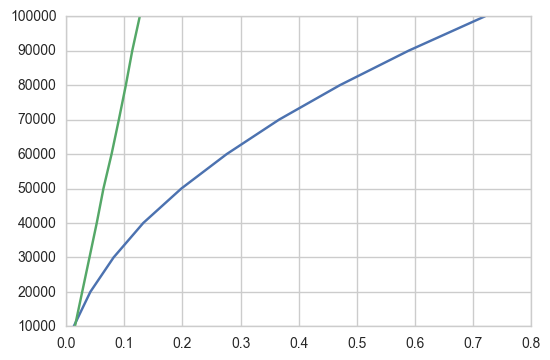

In [257]:
''' 

VITESSE D'APPROXIMATION  

'''
sns.plt.plot(df_jet_aleatoire["temps ecoulé"],df_jet_aleatoire["n"]) # EN BLEU
sns.plt.plot(df_monte_carlo["temps ecoulé"],df_jet_aleatoire["n"]) # EN VERT
'''
    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus rapide que le comptage aléatoire
    
    EN X: le temps ecoulé 
    EN Y: le nombre d'individus pour chaque echantillon

'''

"\n    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus précise que le comptage aléatoire\n        \n    EN X: le nombre d'individus pour chaque echantillon\n    EN Y: le ratio d'erreur relative\n\n"

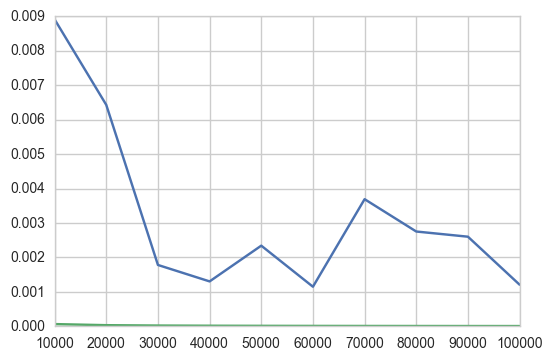

In [270]:
''' 

PRECISION DE CONVERGENCE 

'''
sns.plt.plot(tab_n,df_jet_aleatoire["erreur relative"]) # EN BLEU L"ALEATOIRE
sns.plt.plot(tab_n,df_monte_carlo["erreur relative"]) # EN VERT POUR MONTE_CARLO
'''
    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus précise que le comptage aléatoire
        
    EN X: le nombre d'individus pour chaque echantillon
    EN Y: le ratio d'erreur relative

'''

# 2.1) Simulation de loi normale

In [260]:
val   = list(range(1,5))
probs = [0.10,0.20,0.25,0.45]

In [261]:
esperance_par_xi_reel = list(map(lambda x,y:x*y,val,probs))
esperance_reel        = sum(esperance_par_xi_reel)

In [262]:
def returnX(prob,probs,val):
    stack = 0
    for i in range(len(probs)):
        stack += probs[i] 
        if prob < stack:
            return val[i]
    return val[len(probs)-1]

In [263]:
def returnX_reverse(prob,probs,val):
    stack = 1
    for i in reversed(range(len(probs))):
        stack -= probs[i]
        if prob > stack:
            return val[i]    
    return val[0]
        

### 2.1.1) loi normale en considerant les proba croissantes

In [264]:
esperance_reel = sum(esperance_par_xi_reel)
data           = []

for n in tab_n:    
    xi_simule = []
    start = time.time()
    
    for i in range(n):
        u = random.uniform(0,1)
        x = returnX(u,probs,val)
        xi_simule.append(x)
 
    end          = time.time()
    
    moyenne_emp  = 1/n * (sum(xi_simule))
    variance     = 1/n*(sum(map(lambda x : x - moyenne_emp, xi_simule))**2)
    ecart_type   = math.sqrt(variance)
    erreur_abs   = abs( (esperance_reel - moyenne_emp) / esperance_reel)
    
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [str(cinterval_inf),str(cinterval_sup)]
    
    data.append([
          "random de v.a iid",n,abs(start-end),moyenne_emp,esperance_reel,abs(erreur_abs),ecart_type,confidence
    ])
    
df_loi_normale_continue = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur relative","ecart-type","interval de conf"])

    #results.append(["Monte-Carlo",n,end-start,erreur_abs,ecart_type,""])

In [265]:
df_loi_normale_continue

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,ecart-type,interval de conf
0,random de v.a iid,10000,0.013510,3.053400,3.05,0.001115,6.382450e-14,"[3.053399999999999, 3.0534000000000017]"
1,random de v.a iid,20000,0.028023,3.044500,3.05,0.001803,9.117841e-14,"[3.044499999999999, 3.0445000000000015]"
2,random de v.a iid,30000,0.041541,3.051267,3.05,0.000415,2.392678e-13,"[3.051266666666664, 3.0512666666666695]"
3,random de v.a iid,40000,0.055040,3.053650,3.05,0.001197,6.428902e-13,"[3.053649999999994, 3.0536500000000064]"
4,random de v.a iid,50000,0.070553,3.056180,3.05,0.002026,1.686256e-13,"[3.056179999999999, 3.0561800000000017]"
5,random de v.a iid,60000,0.083549,3.053767,3.05,0.001235,1.051480e-12,"[3.0537666666666583, 3.053766666666675]"
6,random de v.a iid,70000,0.095567,3.049214,3.05,0.000258,1.914693e-12,"[3.0492142857142714, 3.0492142857143]"
7,random de v.a iid,80000,0.108577,3.045288,3.05,0.001545,8.194313e-14,"[3.0452874999999997, 3.0452875000000006]"
8,random de v.a iid,90000,0.123620,3.050411,3.05,0.000135,3.217486e-13,"[3.050411111111109, 3.0504111111111136]"
9,random de v.a iid,100000,0.137607,3.049490,3.05,0.000167,1.268047e-12,"[3.049489999999992, 3.049490000000008]"


### 2.1.2) loi normale en mesurant les proba décroissantes

In [266]:
esperance_reel = sum(esperance_par_xi_reel)
data = []

for n in tab_n:    
    xi_simule = []
    start = time.time()
    
    for i in range(n):
        u = random.uniform(0,1)
        x = returnX_reverse(u,probs,val)
        xi_simule.append(x)
 
    end          = time.time()
    
    moyenne_emp  = 1/n * (sum(xi_simule))
    variance     = 1/n*(sum(map(lambda x : x - moyenne_emp, xi_simule))**2)
    ecart_type   = math.sqrt(variance)
    erreur_abs   = abs( (esperance_reel - moyenne_emp) / esperance_reel)
    
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [str(cinterval_inf),str(cinterval_sup)]
    
    data.append([
          "random de v.a iid",n,abs(start-end),moyenne_emp,esperance_reel,abs(erreur_abs),ecart_type,confidence
    ])
    
df_loi_normale_continue_reverse = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur relative","ecart-type","interval de conf"])

In [267]:
df_loi_normale_continue_reverse

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,ecart-type,interval de conf
0,random de v.a iid,10000,0.015010,3.067400,3.05,0.005705,8.665957e-14,"[3.0673999999999984, 3.067400000000002]"
1,random de v.a iid,20000,0.029521,3.052350,3.05,0.000770,4.760834e-14,"[3.0523499999999997, 3.0523500000000006]"
2,random de v.a iid,30000,0.045532,3.048967,3.05,0.000339,1.783791e-13,"[3.0489666666666646, 3.048966666666669]"
3,random de v.a iid,40000,0.058054,3.045550,3.05,0.001459,1.866840e-13,"[3.045549999999998, 3.0455500000000018]"
4,random de v.a iid,50000,0.074545,3.054800,3.05,0.001574,4.067384e-14,"[3.0547999999999997, 3.0548000000000006]"
5,random de v.a iid,60000,0.087566,3.048900,3.05,0.000361,6.363112e-13,"[3.0488999999999953, 3.048900000000005]"
6,random de v.a iid,70000,0.101567,3.048257,3.05,0.000571,2.668076e-13,"[3.048257142857141, 3.0482571428571448]"
7,random de v.a iid,80000,0.115585,3.050938,3.05,0.000307,5.621685e-13,"[3.0509374999999963, 3.0509375000000043]"
8,random de v.a iid,90000,0.130592,3.048867,3.05,0.000372,1.779252e-12,"[3.048866666666655, 3.048866666666678]"
9,random de v.a iid,100000,0.147102,3.052910,3.05,0.000954,7.108665e-13,"[3.052909999999996, 3.0529100000000047]"


# 2.3) Comparaison des methodes 

"\n    On remarque dans ce graphe que la methode reverse (prob décroissante) est plus lente que le la methode croissante \n    \n    EN X: le temps ecoulé \n    EN Y: le nombre d'individus pour chaque echantillon\n\n"

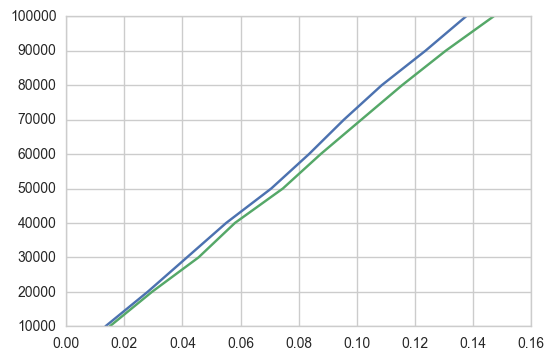

In [268]:
''' 

VITESSE D'APPROXIMATION  

'''
sns.plt.plot(df_loi_normale_continue["temps ecoulé"],tab_n) # EN BLEU
sns.plt.plot(df_loi_normale_continue_reverse["temps ecoulé"],tab_n) # EN VERT
'''
    On remarque dans ce graphe que la methode reverse (prob décroissante) est plus lente que le la methode croissante 
    vitesse(bleu) > vitesse(vert)
    
    EN X: le temps ecoulé 
    EN Y: le nombre d'individus pour chaque echantillon

'''

"\n    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus précise que le comptage aléatoire\n        \n    EN X: le nombre d'individus pour chaque echantillon\n    EN Y: le ratio d'erreur relative\n\n"

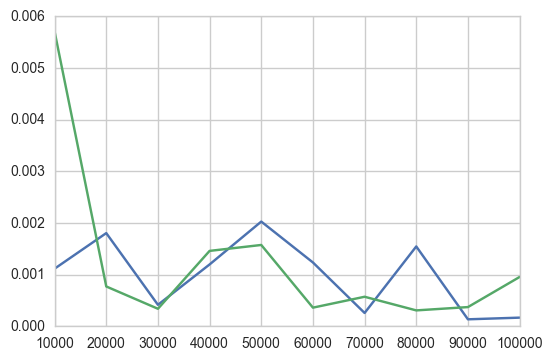

In [271]:
''' 

PRECISION DE CONVERGENCE 

'''
sns.plt.plot(tab_n,df_loi_normale_continue["erreur relative"]) # EN BLEU loi normale ordered probs
sns.plt.plot(tab_n,df_loi_normale_continue_reverse["erreur relative"]) #VERT loi normale reversed probs
'''
    On remarque dans ce graphe que la methode de monte carlo est beaucoup plus précise que le comptage aléatoire
        
    EN X: le nombre d'individus pour chaque echantillon
    EN Y: le ratio d'erreur relative

'''

# 3.1) Simulation de loi géometrique (pseudo inverse de la f.d.r)

In [272]:
data = []

q = 0.7
esperance_reel = 1/(1-q)

for n in tab_n:
    xi_simule = []
    stack = 0
    for index in range(n):
        u = random.uniform(0,1)
        i = 1 
        while True:
            if 1-(q**(i-1)) <= u < 1-(q**(i)):
                break
            else:
                i+=1
        xi_simule.append(i)
        
    moyenne_emp = 1/n * sum(xi_simule)
    variance     = 1/n*(sum(map(lambda x : x - moyenne_emp, xi_simule))**2)
    ecart_type   = math.sqrt(variance)
    erreur_abs   = (esperance_reel - moyenne_emp) / esperance_reel
    
    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [str(cinterval_inf),str(cinterval_sup)]
    
    data.append([
          "invers fdr geo",n,abs(start-end),moyenne_emp,esperance_reel,abs(erreur_abs),ecart_type,confidence
    ])
    
df_loi_geom_inv_fdr = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur relative","ecart-type","interval de conf"])
    
    
    

In [273]:
df_loi_geom_inv_fdr

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,ecart-type,interval de conf
0,invers fdr geo,10000,0.147102,3.332000,3.333333,0.000400,2.002620e-13,"[3.3319999999999963, 3.3320000000000043]"
1,invers fdr geo,20000,0.147102,3.299700,3.333333,0.010090,2.516293e-13,"[3.2996999999999965, 3.2997000000000036]"
2,invers fdr geo,30000,0.147102,3.364533,3.333333,0.009360,7.777333e-13,"[3.3645333333333247, 3.3645333333333425]"
3,invers fdr geo,40000,0.147102,3.337025,3.333333,0.001108,2.440159e-13,"[3.337024999999998, 3.3370250000000024]"
4,invers fdr geo,50000,0.147102,3.324140,3.333333,0.002758,2.590375e-14,"[3.32414, 3.3241400000000008]"
5,invers fdr geo,60000,0.147102,3.322983,3.333333,0.003105,3.639219e-12,"[3.3229833333333043, 3.322983333333363]"
6,invers fdr geo,70000,0.147102,3.325371,3.333333,0.002389,2.431441e-13,"[3.325371428571427, 3.3253714285714304]"
7,invers fdr geo,80000,0.147102,3.329462,3.333333,0.001161,3.392505e-12,"[3.3294624999999765, 3.3294625000000235]"
8,invers fdr geo,90000,0.147102,3.341056,3.333333,0.002317,5.033852e-12,"[3.341055555555523, 3.3410555555555885]"
9,invers fdr geo,100000,0.147102,3.328720,3.333333,0.001384,1.672773e-12,"[3.32871999999999, 3.3287200000000103]"


# 3.2) Simulation de loi géometrique par la formule LN 

In [274]:
esperance_reel = 1/(1-q)
data = []
for n in tab_n:
    xi_simule = []
    
    start = time.time()
    
    for index in range(n):
        
        xi = math.log( (1-random.uniform(0,1)) ) / math.log(q)
        xi_simule.append(xi)
    
    end = time.time()
    
    moyenne_emp = 1/n * sum(xi_simule)
    variance     = 1/n*(sum(map(lambda x : x - moyenne_emp, xi_simule))**2)
    ecart_type   = math.sqrt(variance)
    erreur_abs   = (esperance_reel - moyenne_emp) / esperance_reel

    cinterval_inf = moyenne_emp-(1.96*ecart_type/math.sqrt(n))
    cinterval_sup = moyenne_emp+(1.96*ecart_type/math.sqrt(n))
    confidence = [str(cinterval_inf),str(cinterval_sup)]
    
    data.append([
          "Loi geo app. par LN",n,abs(start-end),moyenne_emp,esperance_reel,abs(erreur_abs),ecart_type,confidence
    ])
    
df_loi_geom_LN = pd.DataFrame(data,columns=["methode","n","temps ecoulé","val. approchée",
                                        "val. réelle","erreur relative","ecart-type","interval de conf"])
    

In [275]:
df_loi_geom_LN

,methode,n,temps ecoulé,val. approchée,val. réelle,erreur relative,ecart-type,interval de conf
0,Loi geo app. par LN,10000,0.010508,2.794078,3.333333,0.161777,8.124168e-14,"[2.794078224532121, 2.7940782245321247]"
1,Loi geo app. par LN,20000,0.020510,2.836328,3.333333,0.149102,1.029533e-12,"[2.8363276558154187, 2.836327655815447]"
2,Loi geo app. par LN,30000,0.034014,2.806754,3.333333,0.157974,2.547656e-12,"[2.8067544444551227, 2.8067544444551804]"
3,Loi geo app. par LN,40000,0.040528,2.792115,3.333333,0.162366,3.001299e-12,"[2.7921148774419953, 2.792114877442054]"
4,Loi geo app. par LN,50000,0.049535,2.775684,3.333333,0.167295,2.654754e-12,"[2.775683509031835, 2.775683509031881]"
5,Loi geo app. par LN,60000,0.060542,2.782720,3.333333,0.165184,4.071107e-12,"[2.782720086094797, 2.7827200860948618]"
6,Loi geo app. par LN,70000,0.070549,2.788864,3.333333,0.163341,7.432727e-12,"[2.7888642470024028, 2.788864247002513]"
7,Loi geo app. par LN,80000,0.078054,2.785146,3.333333,0.164456,1.179523e-12,"[2.785146180238019, 2.785146180238035]"
8,Loi geo app. par LN,90000,0.087561,2.808323,3.333333,0.157503,1.103550e-11,"[2.808322501828783, 2.808322501828927]"
9,Loi geo app. par LN,100000,0.098069,2.805650,3.333333,0.158305,1.397633e-12,"[2.8056504708986725, 2.8056504708986902]"


# 3.3) Comparaison des methodes

"\n    \n    EN X: le temps ecoulé \n    EN Y: le nombre d'individus pour chaque echantillon\n\n"

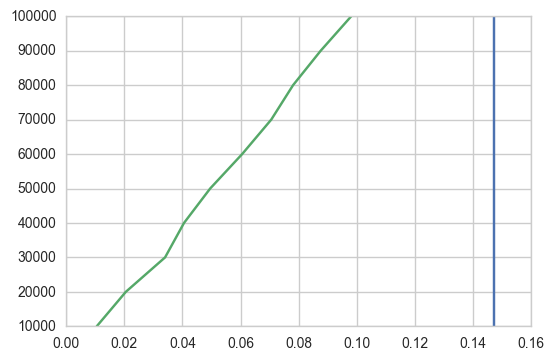

In [276]:
''' 

VITESSE D'APPROXIMATION  

'''
sns.plt.plot(df_loi_geom_inv_fdr["temps ecoulé"],tab_n) # EN BLEU, inverse de fdr
sns.plt.plot(df_loi_geom_LN["temps ecoulé"],tab_n) # EN VERT, ln(1-q)/ln(q)
'''
    
    EN X: le temps ecoulé 
    EN Y: le nombre d'individus pour chaque echantillon

'''

"\n        \n    EN X: le nombre d'individus pour chaque echantillon\n    EN Y: le ratio d'erreur relative\n\n"

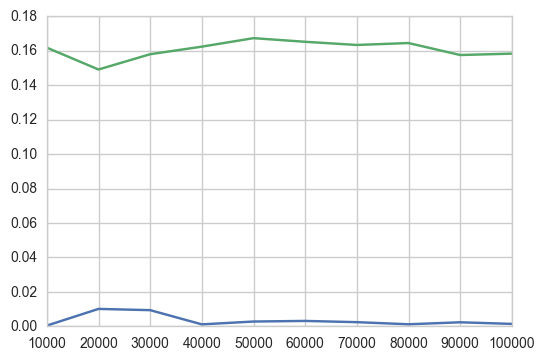

In [277]:
''' 

PRECISION DE CONVERGENCE 

'''
sns.plt.plot(tab_n,df_loi_geom_inv_fdr["erreur relative"])  # EN BLEU, inverse de fdr
sns.plt.plot(tab_n,df_loi_geom_LN["erreur relative"])  # EN VERT, ln(1-q)/ln(q)
'''
        
    EN X: le nombre d'individus pour chaque echantillon
    EN Y: le ratio d'erreur relative

'''